In [1]:
#load libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
#load dataset
df=pd.read_csv(r'C:\Users\Abel\Downloads\SalaryData_Train.csv')

In [3]:
df.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


In [5]:
#statistical info
df.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000
mean,38.438115,10.121316,1092.044064,88.302311,40.931269
std,13.134830,2.550037,7406.466611,404.121321,11.980182
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


<AxesSubplot:>

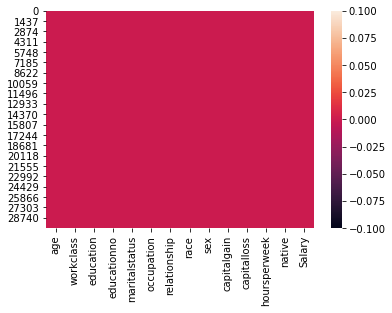

In [6]:
#null value visualization
sns.heatmap(df.isnull())

<AxesSubplot:xlabel='Salary', ylabel='count'>

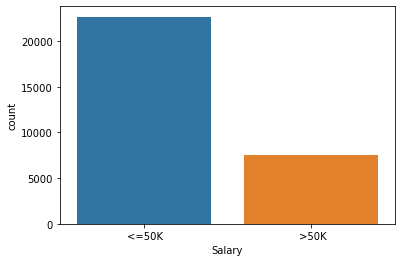

In [7]:
#visualisation
sns.countplot(df.Salary)

In [8]:
#upsampling the data to get data balanced 
from imblearn.over_sampling import RandomOverSampler
x=df.iloc[:,0:13]
y=df.iloc[:,-1]


over_sampler = RandomOverSampler()

x1,y2= over_sampler.fit_resample(x,y)


<AxesSubplot:xlabel='Salary', ylabel='count'>

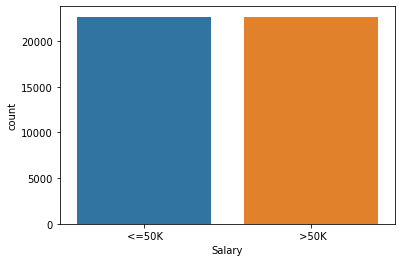

In [9]:
#visualisation
sns.countplot(y2)

## Now data is balanced

In [10]:
#convert to numerical values for computation
x2=pd.get_dummies(x1)

In [11]:
#libraries
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report

In [12]:
#building the naive_bayes
gnb=GaussianNB()
model=gnb.fit(x2,y2)

In [13]:
#prediction
pred=model.predict(x2)

In [14]:
#classification_report 
print(classification_report(y2,pred))

              precision    recall  f1-score   support

       <=50K       0.79      0.80      0.80     22653
        >50K       0.80      0.79      0.80     22653

    accuracy                           0.80     45306
   macro avg       0.80      0.80      0.80     45306
weighted avg       0.80      0.80      0.80     45306



## Predicting on Test Data

In [15]:
#loading Testing dataset
df_test=pd.read_csv(r'C:\Users\Abel\Downloads\SalaryData_Test.csv')

In [16]:
df_test.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


In [17]:
#separatting input and target
x_test=df_test.iloc[:,0:13]
y_test1=df_test.iloc[:,-1]


In [18]:
x_test1=pd.get_dummies(x_test)

In [19]:
#testing the model on test data
pred1=model.predict(x_test1)


In [20]:
#accuracy
print(classification_report(pred1,y_test1))

              precision    recall  f1-score   support

       <=50K       0.80      0.92      0.86      9875
        >50K       0.80      0.57      0.66      5185

    accuracy                           0.80     15060
   macro avg       0.80      0.75      0.76     15060
weighted avg       0.80      0.80      0.79     15060



[Text(0.5, 0, 'Test data')]

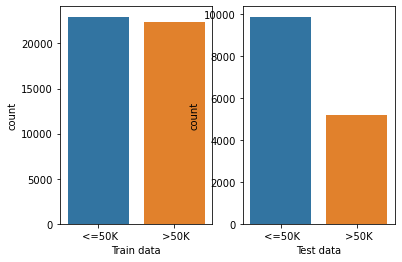

In [21]:
plt.subplot(121)
ax=sns.countplot(pred)
ax.set(xlabel='Train data')
plt.subplot(122)
ay=sns.countplot(pred1)
ay.set(xlabel='Test data')